### AutoRegressive Model states that `present value depends on past values`

### `it is a regression against itself`

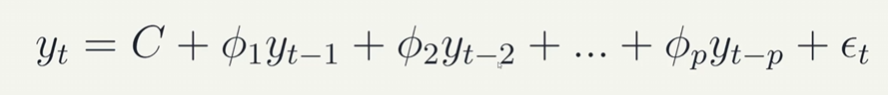

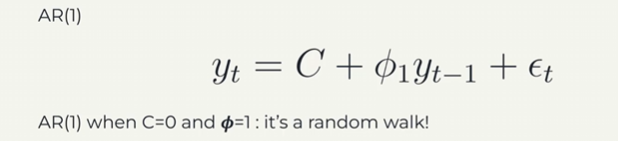

### `random walk is the special case of AR(1) Model`

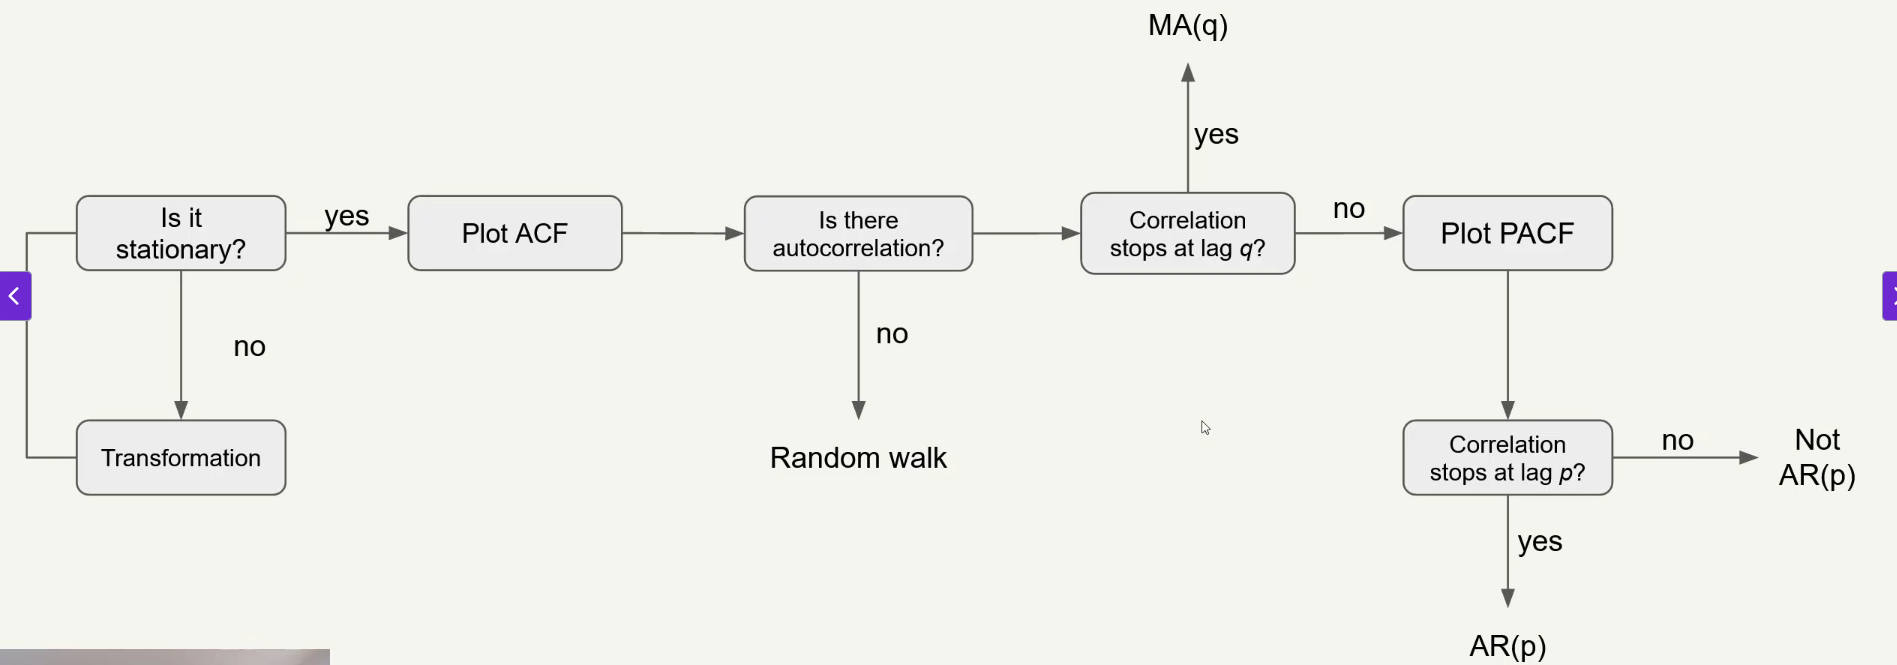

### If ACF Plot is slowly `decaying or sinusoidal`, then you know that we've to plot the PACF Plot.


### PACF measures the correlation between lagged values in a time series when we remove the influence of correlated lagged values `in between`

### PACF isolates the effect of each lag by removing the influence of correlated lagged values in between.

### The PACF plot can identify the `order of AR Process`.

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
np.random.seed(1)

ma2 = np.array([1,0,0])
ar2 = np.array([1,-0.33,-0.56])
ar2_process = ArmaProcess(ar2,ma2).generate_sample(1000)
ar2_process

array([ 1.62434536e+00, -7.57224436e-02,  3.56473245e-01, -9.97737020e-01,
        7.35779430e-01, -2.61746422e+00,  1.29308505e+00, -1.80026879e+00,
        4.49078024e-01, -1.10932515e+00,  1.34751433e+00, -2.23668307e+00,
       -3.05914591e-01, -1.73754869e+00,  3.89066205e-01, -1.94452668e+00,
       -5.96244939e-01, -2.16355419e+00, -1.00565630e+00, -9.60641713e-01,
       -1.98079847e+00, -4.68991448e-02, -2.23133141e-01,  4.02596881e-01,
        9.08758361e-01, -1.58383347e-01,  3.33747952e-01, -9.14327284e-01,
       -3.82717230e-01, -1.07964498e-01, -9.41610685e-01, -7.67945172e-01,
       -1.46789659e+00, -1.75966081e+00, -2.07395629e+00, -1.68248023e+00,
       -2.83394435e+00, -1.64297487e+00, -4.69388362e-01, -3.32919924e-01,
       -5.64556610e-01, -1.26036780e+00, -1.47923137e+00,  4.98502279e-01,
       -6.13056060e-01, -5.60142870e-01, -3.37243056e-01,  1.67528492e+00,
        4.84146865e-01,  1.71513113e+00,  1.13728584e+00,  9.83527913e-01,
       -1.81073918e-01,  

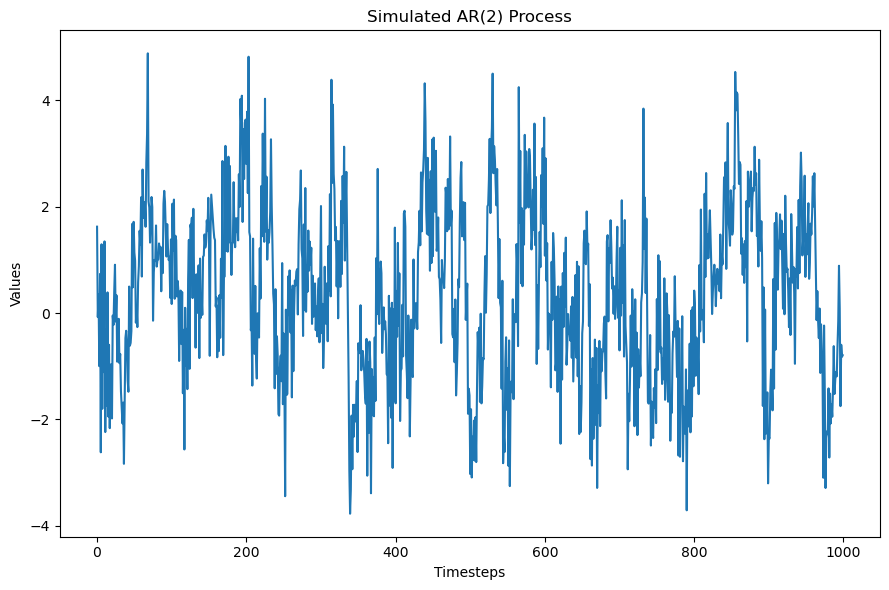

In [4]:
fig, ax = plt.subplots()

ax.plot(ar2_process)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Values")
ax.set_title("Simulated AR(2) Process")
plt.tight_layout()

In [6]:
# Stationarity Check

ADF_result = adfuller(ar2_process)

print(f"ADF Test statistic : {ADF_result[0]}")
print(f"P-value : {ADF_result[1]}")

ADF Test statistic : -6.732979897336915
P-value : 3.2604128940252546e-09


### Since p-value < 0.05, we conclude that the given time series is stationary in nature.

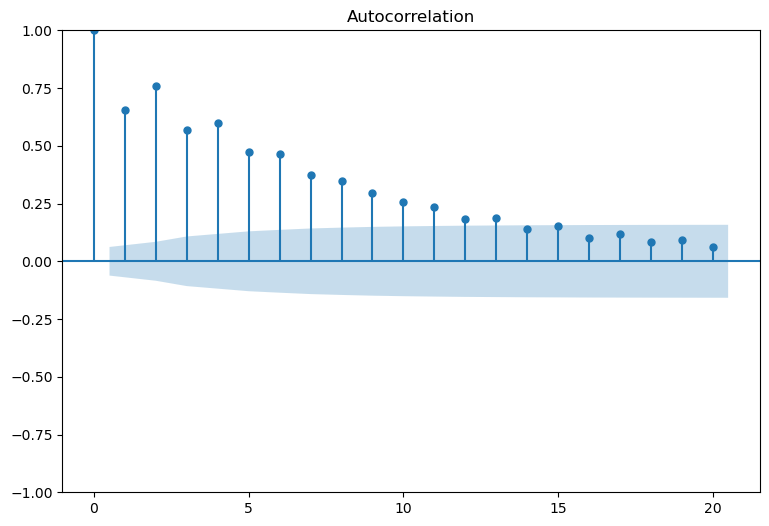

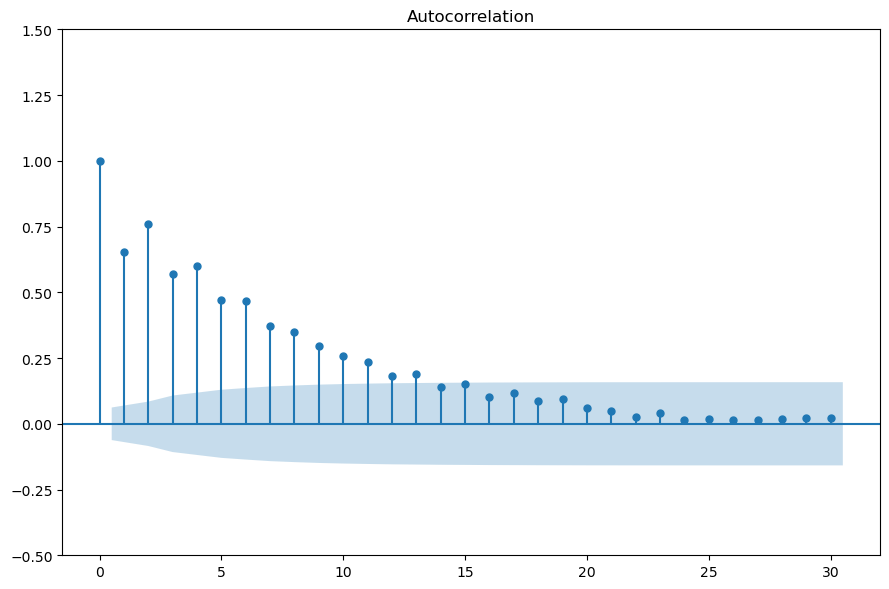

In [9]:
plot_acf(ar2_process, lags=20)
plot_acf(ar2_process, lags=30)

plt.ylim(-0.5, 1.5)
plt.tight_layout()

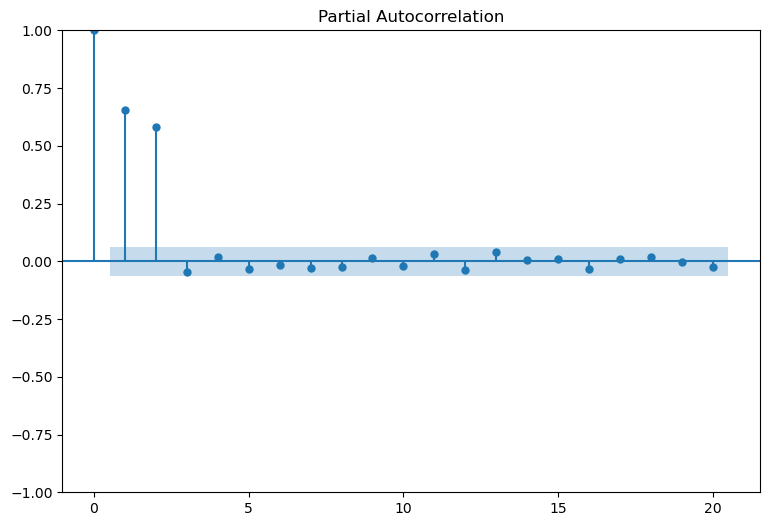

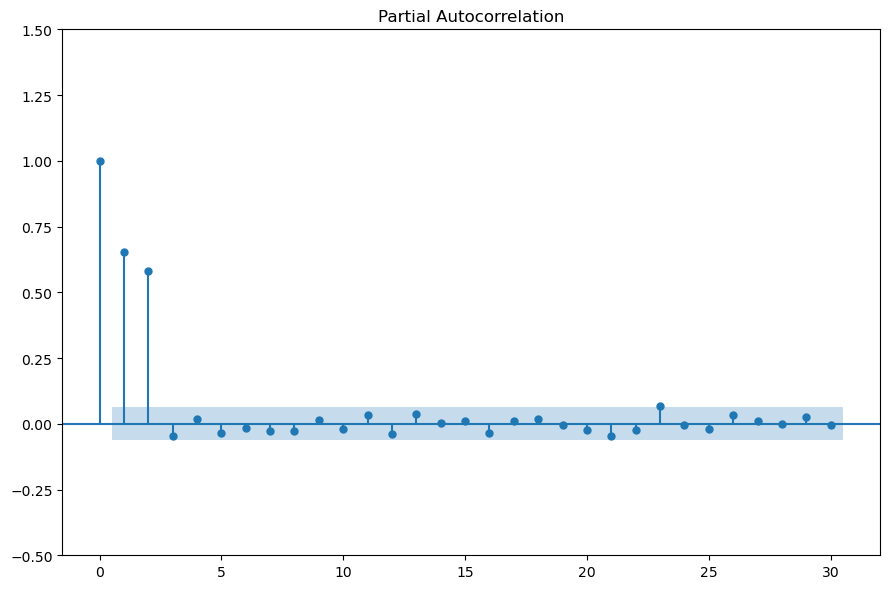

In [10]:
plot_pacf(ar2_process, lags=20)
plot_pacf(ar2_process, lags=30)

plt.ylim(-0.5,1.5)
plt.tight_layout()

### We conclude that it is the AR(2) Process since the correlation stops at p = 2

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesForecastingInPython/refs/heads/master/data/simulated_AR2.csv")
data.head()

,value
0,100.000000
1,100.496714
2,100.507464
3,101.456406
4,103.270569


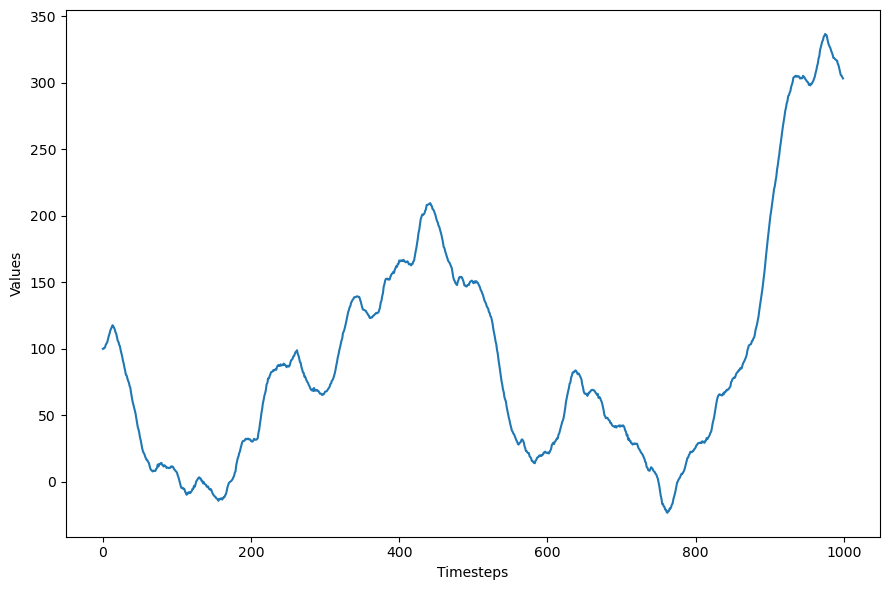

In [12]:
fig, ax = plt.subplots()

ax.plot(data["value"])
ax.set_xlabel("Timesteps")
ax.set_ylabel("Values")
plt.tight_layout()

In [16]:
ADF_result = adfuller(data["value"])

print(f"ADF Test statistic : {ADF_result[0]}")
print(f"P-value : {ADF_result[1]}")

ADF Test statistic : -1.1218683768898041
P-value : 0.7062727342770825


### First order differencing lead to stationary data

In [19]:
ADF_result = adfuller(np.diff(data.value, n=1))

print(f"ADF Test statistic : {ADF_result[0]}")
print(f"P-value : {ADF_result[1]}")

ADF Test statistic : -5.565515624443827
P-value : 1.5079043416320668e-06


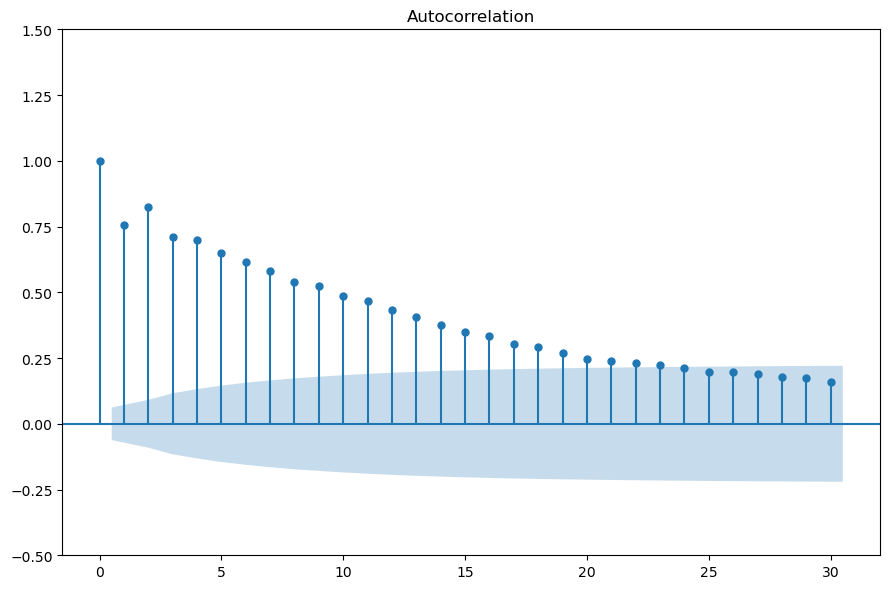

In [24]:
# plot_acf(data["value"], lags=20)
plot_acf(np.diff(data.value, n=1), lags=30)

plt.ylim(-0.5, 1.5)
plt.tight_layout()

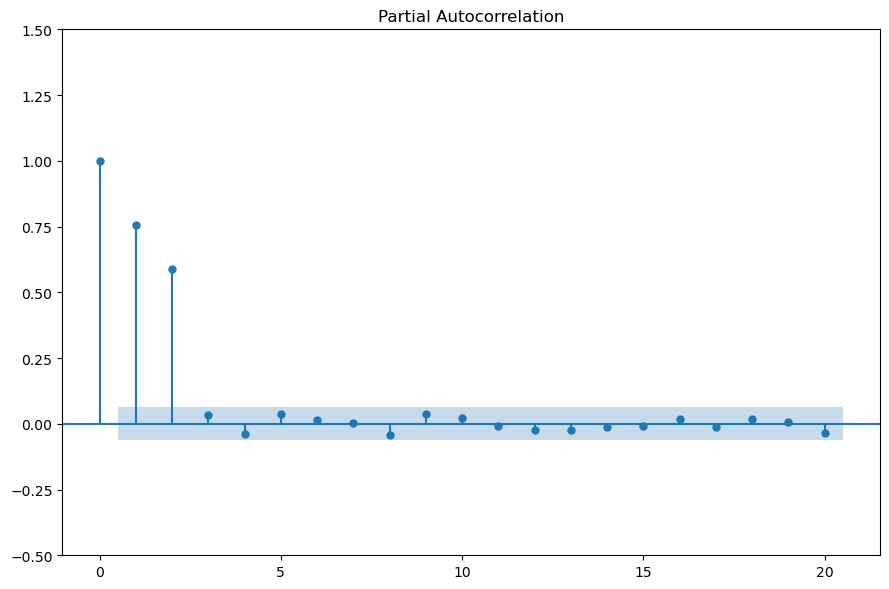

In [25]:
plot_pacf(np.diff(data.value, n=1), lags=20)
# plot_pacf(data["value"], lags=30)

plt.ylim(-0.5,1.5)
plt.tight_layout()

### It's clear the correlation stops at P = 2, hence it's an AR(2) Process.

In [33]:
transformed_data = np.diff(data.value, n = 1)

transformed_data = pd.DataFrame({"values" : transformed_data})

In [39]:
train = transformed_data[:-100]
test = transformed_data[-100:]
len(train), len(test)

(899, 100)

In [48]:
train.tail()

,values
894,6.000748
895,5.645453
896,5.126967
897,5.072075
898,5.804312


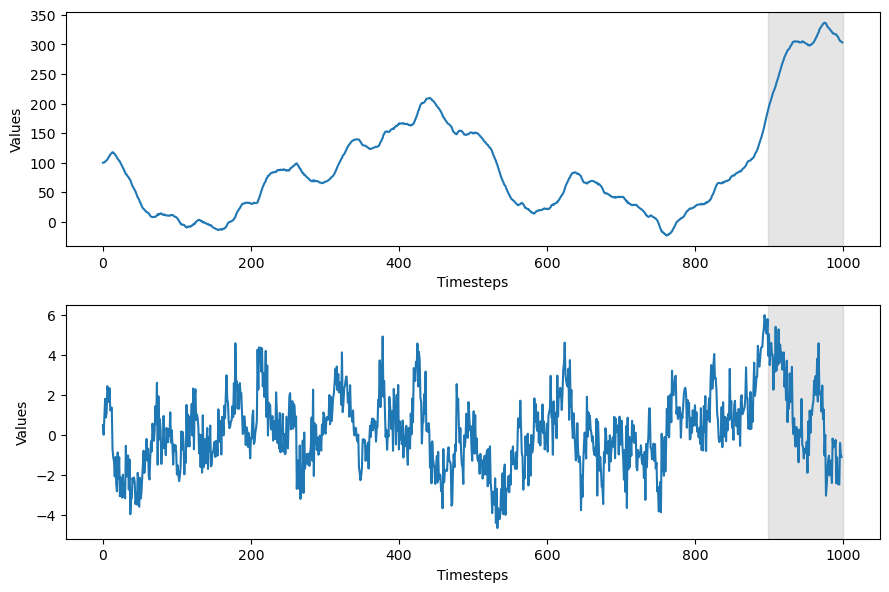

In [44]:
fig , (ax1, ax2) = plt.subplots(2,1)

ax1.plot(data["value"])
ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Values")
ax1.axvspan(899,1000, color = '#808080', alpha = 0.2 )

ax2.plot(transformed_data["values"])
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Values")
ax2.axvspan(899,1000, color = '#808080', alpha = 0.2 )

plt.tight_layout()

In [49]:
def rolling_predictions(df, last_train_value, train_len ,horizon, window, method):

    TOTAL_LEN = train_len + horizon

    if method == "mean":
        pred_mean = []

        for i in range(train_len, TOTAL_LEN, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        
        pred_mean = np.concatenate((last_train_value, pred_mean))
        pred_mean = pred_mean.cumsum()

        return pred_mean[:100]
    elif method == "last":
        pred_last = []

        for i in range(train_len, TOTAL_LEN, window):
            last_val = df[:i].iloc[-1].values[0]
            pred_last.extend(last_val for _ in range(window))
        
        pred_last = np.concatenate((last_train_value, pred_last))
        pred_last = pred_last.cumsum()

        return pred_last[:100]
    
    elif method == "AR":

        pred_AR = []

        for i in range(train_len, TOTAL_LEN, window):
            model = SARIMAX(df[:i], order = (2,0,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_predictions =  predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_predictions)
        
        pred_AR = np.concatenate((last_train_value, pred_AR))
        pred_AR = pred_AR.cumsum()

        return pred_AR[:100]


In [51]:
pred_df = data[-100:].copy()

TRAIN_LEN = len(train)
HORIZON = len(test)
LAST_TRAIN_VALUE = data.iloc[899].values

windows = [1, 2, 5, 10]

for window in windows:
    pred_mean = rolling_predictions(transformed_data, LAST_TRAIN_VALUE, TRAIN_LEN, HORIZON, window, 'mean')
    pred_last = rolling_predictions(transformed_data, LAST_TRAIN_VALUE, TRAIN_LEN, HORIZON, window, 'last')
    pred_AR = rolling_predictions(transformed_data, LAST_TRAIN_VALUE, TRAIN_LEN, HORIZON, window, 'AR')

    pred_df[f'pred_mean_{window}'] = pred_mean
    pred_df[f'pred_last_{window}'] = pred_last
    pred_df[f'pred_AR_{window}'] = pred_AR

pred_df.head()

,value,pred_mean_1,pred_last_1,pred_AR_1,pred_mean_2,pred_last_2,pred_AR_2,pred_mean_5,pred_last_5,pred_AR_5,pred_mean_10,pred_last_10,pred_AR_10
900,194.932437,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834
901,199.973978,191.066019,196.769146,195.747786,191.066019,196.769146,195.747786,191.066019,196.769146,195.747786,191.066019,196.769146,195.747786
902,203.473664,191.171499,200.736749,200.371169,191.167203,202.573457,200.635773,191.167203,202.573457,200.635773,191.167203,202.573457,200.635773
903,207.577239,191.282458,205.778290,204.265177,191.278162,207.614998,204.529780,191.268388,208.377769,204.961730,191.268388,208.377769,204.961730
904,212.186574,191.397174,209.277975,208.299480,191.389121,212.656539,208.690218,191.369572,214.182080,209.171915,191.369572,214.182080,209.171915


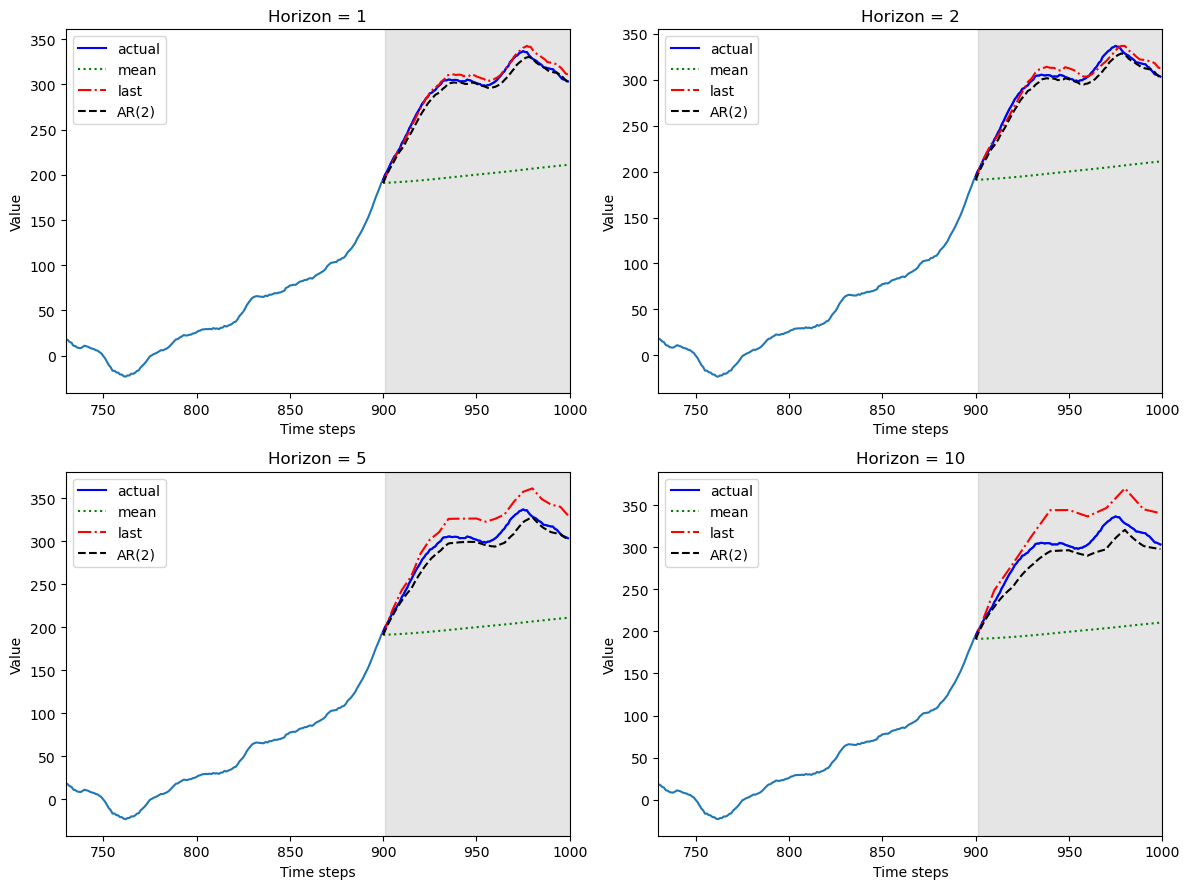

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

for i, ax in enumerate(axes.flatten()):
    
    ax.plot(data['value'])
    ax.plot(pred_df['value'], 'b-', label='actual')
    ax.plot(pred_df[f'pred_mean_{windows[i]}'], 'g:', label='mean')
    ax.plot(pred_df[f'pred_last_{windows[i]}'], 'r-.', label='last')
    ax.plot(pred_df[f'pred_AR_{windows[i]}'], 'k--', label='AR(2)')
    
    ax.legend(loc=2)
    ax.set_xlabel('Time steps')
    ax.set_ylabel('Value')
    ax.axvspan(901, 1000, color='#808080', alpha=0.2)
    ax.set_xlim(730, 1000)
    ax.set_title(f'Horizon = {windows[i]}')
    
plt.tight_layout()